In [1]:
import sympy
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
sympy.init_printing()

In [3]:
u_max = sympy.symbols('u_max')
u_star = sympy.symbols('u_star')
rho_max = sympy.symbols('rho_star')
rho_star = sympy.symbols('rho_star')
A, B = sympy.symbols('A B')

In [4]:
type(u_max)

sympy.core.symbol.Symbol

In [5]:
u_max

In [6]:
u_max+u_star

In [7]:
# No traffic flux at max density
eq1 = sympy.Eq(0, rho_max* u_max*(1-A*rho_max-B*rho_max**2))
eq1


In [8]:
# Maximum flux when rho = rho_star
eq2 = sympy.Eq(0, u_max*(1-2*A*rho_star-3*B*rho_max**2))
eq2

In [10]:
# Velocity u_star when rho = rho_star.
eq3 = sympy.Eq(u_star, u_max * (1-A*rho_star-B*rho_star**2))
eq3

In [11]:
eq2 - 3*eq3

In [13]:
eq4 = sympy.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3*eq3.rhs)
eq4

In [14]:
eq4.simplify()

In [27]:
rho_star_sol = sympy.solve(eq4, rho_star)[0]

In [28]:
type(rho_star_sol)

sympy.core.mul.Mul

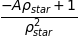

In [29]:
B_sol = sympy.solve(eq1, B)[0]
B_sol

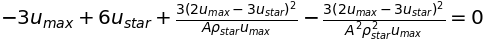

In [30]:
eq5 = eq2.subs([(rho_star, rho_star_sol), (B, B_sol)])
eq5.simplify()

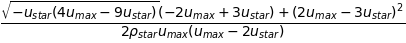

In [37]:
A_sol = sympy.solve(eq5, A)
A_sol[0]
#B_sol

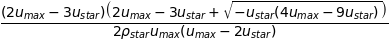

In [38]:
A_sol[1]

In [39]:
A_val_0 = A_sol[0].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_0

In [40]:
A_val_1 = A_sol[1].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_1

In [42]:
A_val = max(A_val_0, A_val_1)
A_val
B_val = B_sol.evalf(subs={rho_max: 10.0, A: A_val})
B_val

In [43]:
rho_max = 10.0
u_max = 1.0

In [45]:
def flux(rho, u_max, A, B):
    F = rho * u_max * (1.0 - A * rho - B * rho**2)
    return F  

In [46]:
def initial(x, rho):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [47]:
nx = 81
L = 4.0
dx = L/(nx-1)
nt = 30
rho_light = 5.0

x = numpy.linspace(0.0, L, num=nx)

rho0 = initial(x, rho_light)

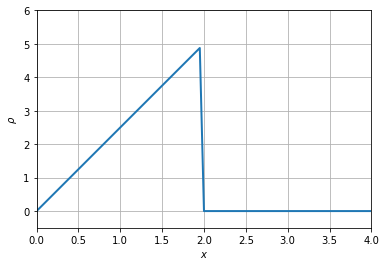

In [48]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 6.0)

In [54]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range (nt):
        F = flux(rho, *args)
        rho[1:] = rho[1:] - dt / dx * (F[1:]-F[:-1])
        rho[0] = bc_value
        rho_hist.append(rho.copy())
    return rho_hist

In [55]:
sigma = 1.0
dt = sigma * dx / u_max
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, A_val, B_val)

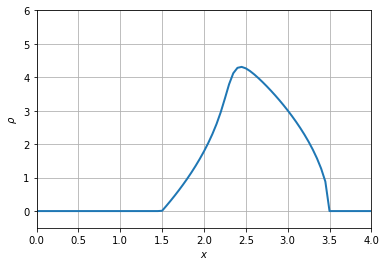

In [64]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho_hist[30], color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 6.0)
len(rho_hist)

In [ ]:
def lax_fridrichs(rho0, nt, dt, dx, flux, *args):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        F = flux(u, *args)
        u[1:-1] = (0.5 * (u[:-2] + u[2:]) - dt * (F[2:]-F[:-2])/(2*dx))
        
        u_hist.append(u.copy())
    return 